# WILDLIFE

In [ ]:
!pip install geopandas pandas
!pip install matplotlib shapely
!pip install osmnx
!pip install imagecodecs
!pip install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
import osmnx as ox

# South West Western Australia

In [ ]:
coordinate = (-34.135489941944336, 115.63404205323194)

def get_landuse_and_street_network(coordinate, distance):
    # Get the land use data within the specified distance from the coordinate
    landuse_query = f'landuse and (around:{distance},{coordinate[0]},{coordinate[1]})'
    landuse_features = ox.geometries.geometries_from_point(coordinate, tags={'landuse': True}, dist=distance)

    # Convert the land use data to a GeoDataFrame
    landuse_gdf = gpd.GeoDataFrame(landuse_features)

    # Get the street network data within the specified distance from the coordinate
    street_network = ox.graph_from_point(coordinate, dist=distance, network_type='all')

    return landuse_gdf, street_network


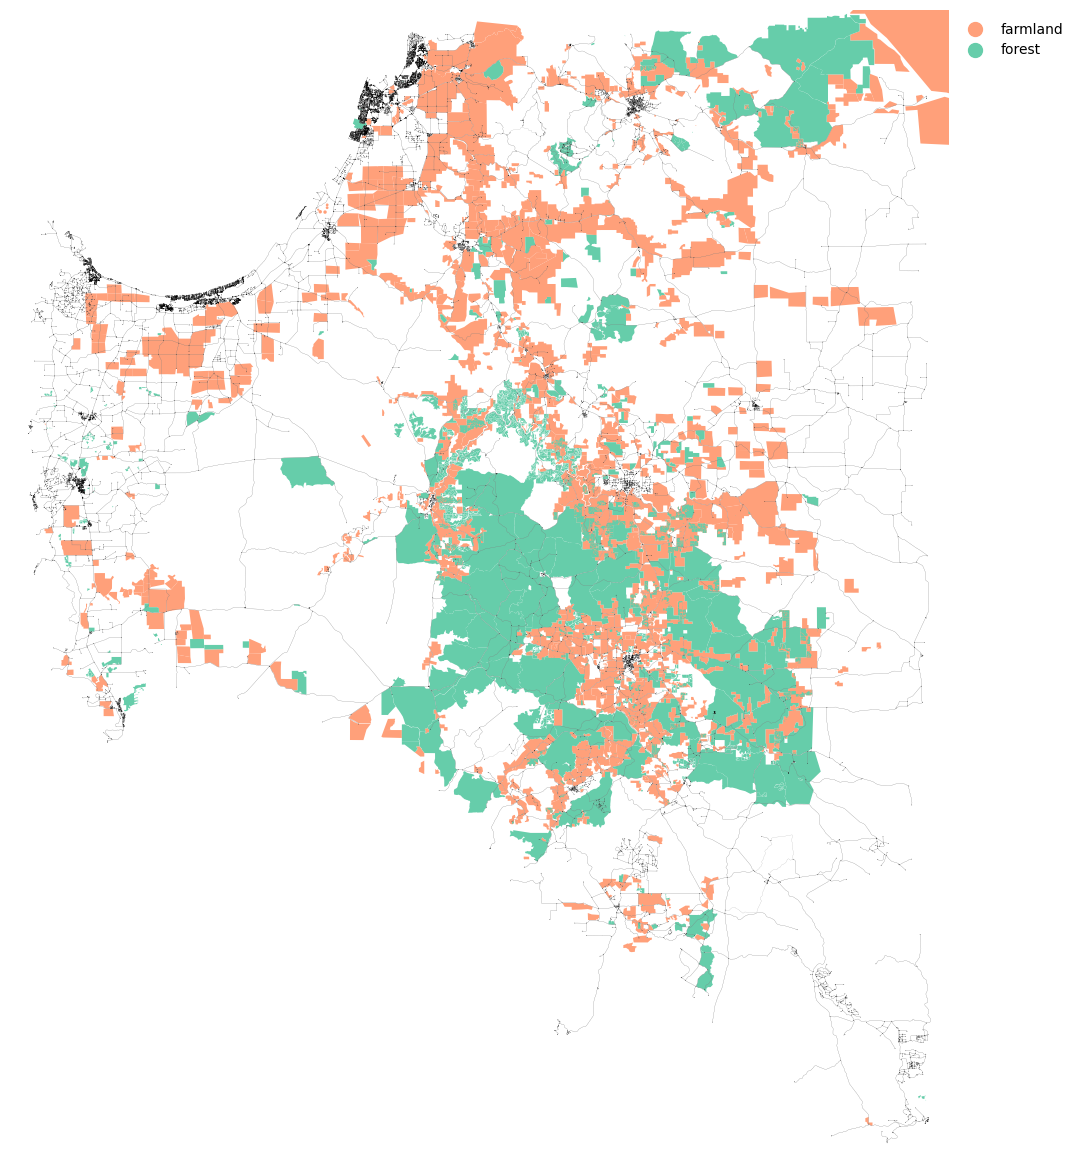

In [ ]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

distance = 100000  # You can adjust the distance to your preference

# Get the landuse data and street network
landuse_gdf, street_network = get_landuse_and_street_network(coordinate, distance)

# Filter landuse_gdf to include only 'farmland' and 'forest' land use types
landuse_gdf = landuse_gdf[landuse_gdf['landuse'].isin(['farmland', 'forest'])]

# Create a color dictionary for the land use types
color_dict = {'farmland': 'lightsalmon', 'forest': 'mediumaquamarine'}

# Plot the land use data with specific colors for 'farmland' and 'forest'
fig, ax = plt.subplots(figsize=(15, 15))

for ctype, data in landuse_gdf.groupby('landuse'):
    color = color_dict[ctype]
    data.plot(color=color, ax=ax)

# Create legend handles manually with circles
legend_handles = [mlines.Line2D([], [], color=color_dict[ctype], marker='o', markersize=10,
                                label=ctype, linestyle='None') for ctype in color_dict]

# Add a legend to the plot and remove its border
ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Plot the street network on the same diagram
ox.plot_graph(street_network, ax=ax, node_color='black', node_size=0.2, bgcolor='white', edge_color='grey', edge_linewidth=0.1, show=False, close=False)

# Display the combined land use and street network plot
plt.show()


In [ ]:
def get_landuse_and_street_network(coordinate, distance):
    landuse_features = ox.geometries.geometries_from_point(coordinate, tags={'landuse': True}, dist=distance)
    landuse_gdf = gpd.GeoDataFrame(landuse_features)
    street_network = ox.graph_from_point(coordinate, dist=distance, network_type='drive')
    return landuse_gdf, street_network

# Create the farmland and forest dataframes
landuse_gdf, street_network = get_landuse_and_street_network(coordinate,distance)
farmland_gdf = landuse_gdf[landuse_gdf['landuse'] == 'farmland']
forest_gdf = landuse_gdf[landuse_gdf['landuse'] == 'forest']

# Function to plot land use and street network with customizable colors
def plot_landuse_and_network(landuse_gdf, street_network, title, color, node_color, edge_color):
    fig, ax = plt.subplots(figsize=(15, 15))
    landuse_gdf['color'] = color
    landuse_gdf.plot(ax=ax, color=landuse_gdf['color'], legend=True)
    ox.plot_graph(street_network, ax=ax, node_color=node_color, node_size=0.2, bgcolor='white', edge_color=edge_color, edge_linewidth=0.1, show=False, close=False)
    plt.title(title)
    plt.show()

# Plot farmland polygons and street network with specific color
plot_landuse_and_network(farmland_gdf, street_network, "Farmland Polygons and Street Network", color='lightsalmon', node_color='black', edge_color='grey')

# Plot forest polygons and street network with specific color
plot_landuse_and_network(forest_gdf, street_network, "Forest Polygons and Street Network", color='mediumaquamarine', node_color='black', edge_color='grey')


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


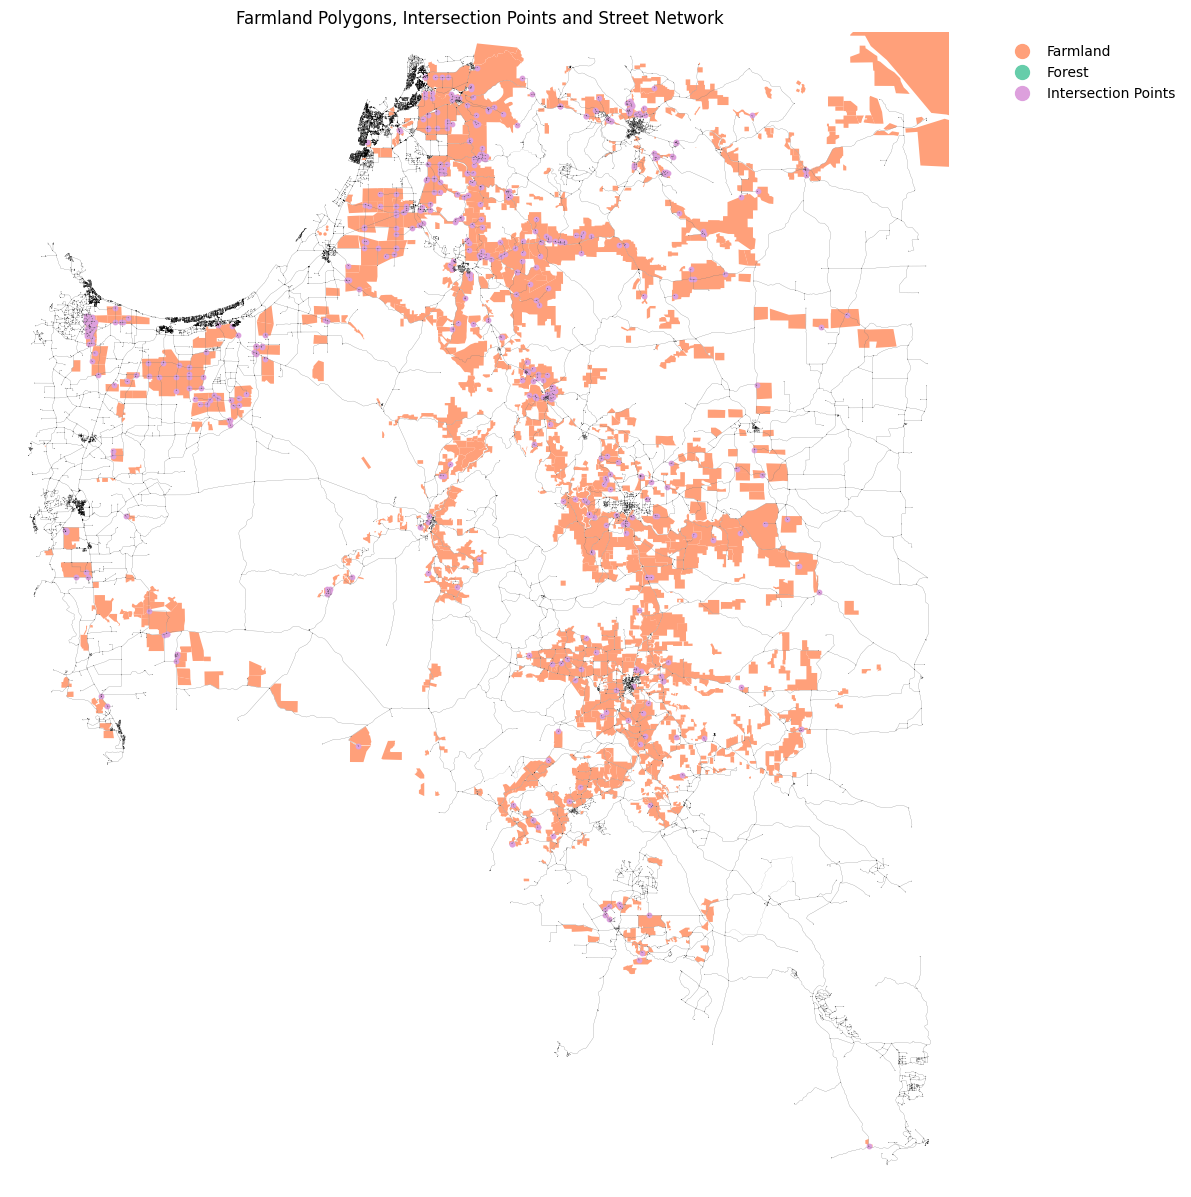

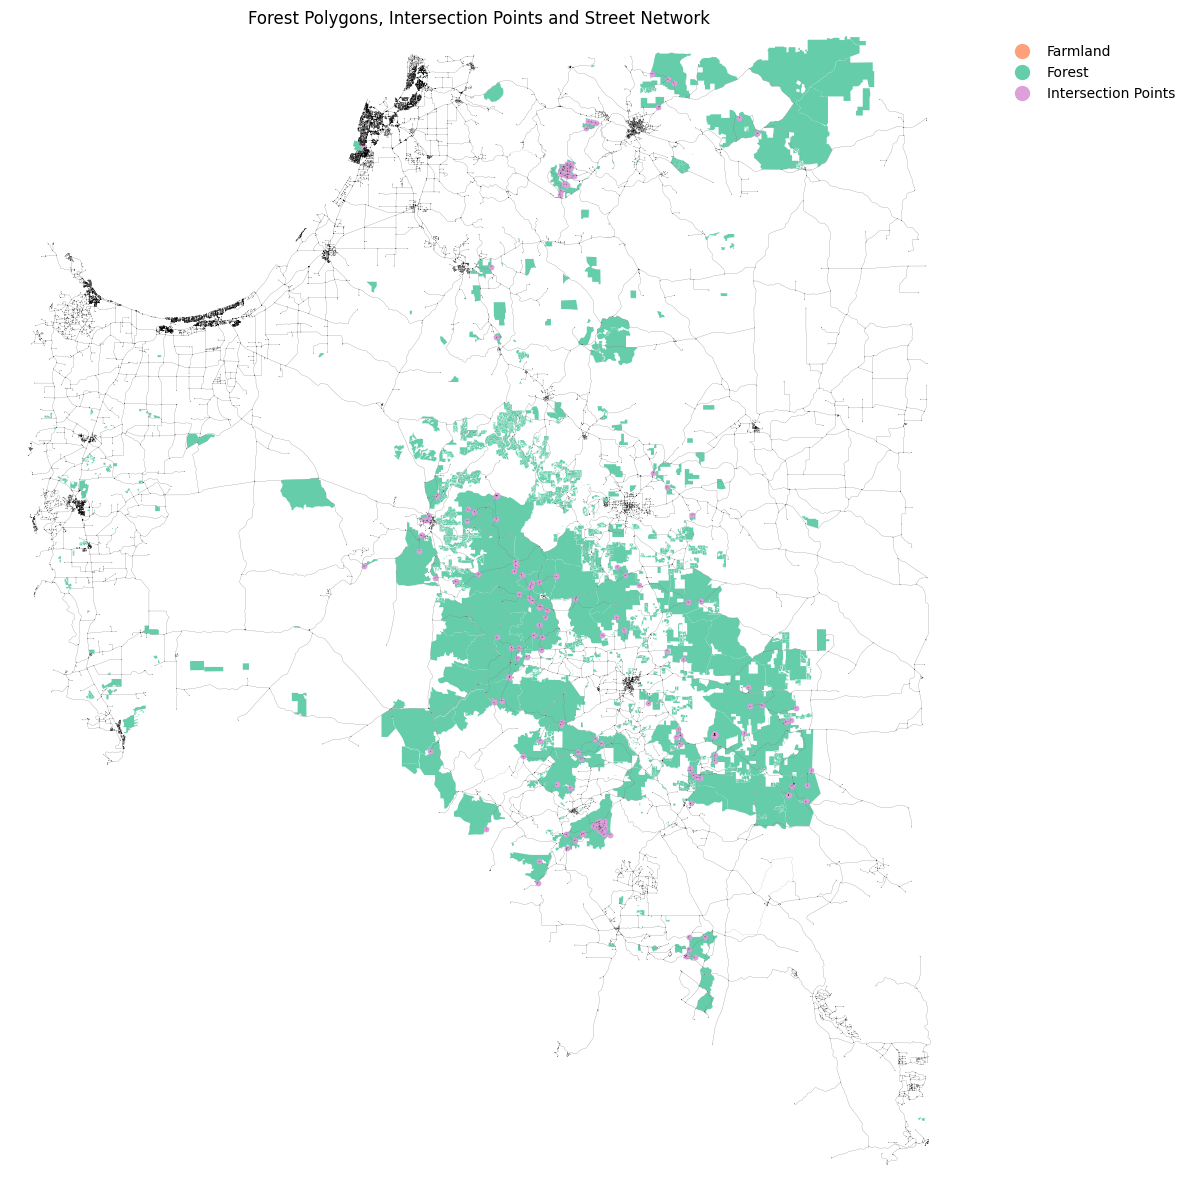

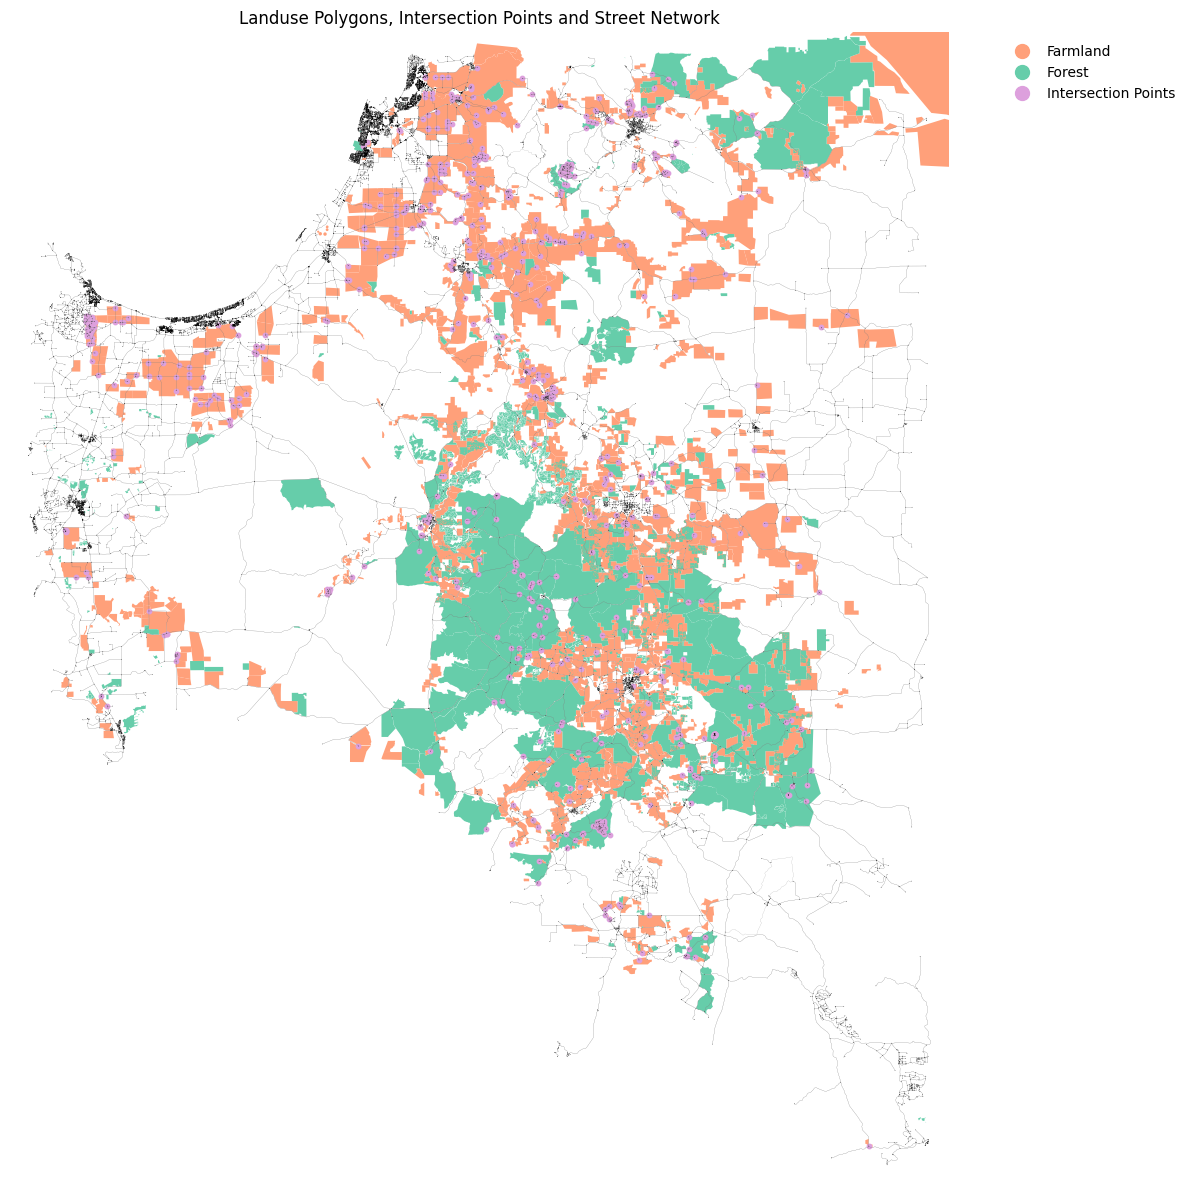

In [ ]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def get_landuse_and_street_network(coordinate, distance):
    landuse_features = ox.geometries.geometries_from_point(coordinate, tags={'landuse': True}, dist=distance)
    landuse_gdf = gpd.GeoDataFrame(landuse_features)
    street_network = ox.graph_from_point(coordinate, dist=distance, network_type='drive')
    return landuse_gdf, street_network

landuse_gdf, street_network = get_landuse_and_street_network(coordinate,distance)

farmland_gdf = landuse_gdf[landuse_gdf['landuse'] == 'farmland']
farmland_gdf['color'] = 'lightsalmon'
forest_gdf = landuse_gdf[landuse_gdf['landuse'] == 'forest']
forest_gdf['color'] = 'mediumaquamarine'

# Create GeoDataFrame of street network nodes
nodes = {node: Point(data['x'], data['y']) for node, data in street_network.nodes(data=True)}
nodes_gdf = gpd.GeoDataFrame(nodes.items(), columns=['node', 'geometry'], crs=landuse_gdf.crs)

# Calculate intersection points
farmland_intersection_points = gpd.overlay(nodes_gdf, farmland_gdf, how='intersection')
forest_intersection_points = gpd.overlay(nodes_gdf, forest_gdf, how='intersection')

# Create new DataFrame with intersection points
intersection_df = pd.concat([farmland_intersection_points, forest_intersection_points])
intersection_df = intersection_df[['geometry']].copy()
intersection_df['x'] = intersection_df.geometry.x
intersection_df['y'] = intersection_df.geometry.y
intersection_df = intersection_df.round(5)
intersection_df = intersection_df.drop_duplicates()

def plot_landuse_and_network(landuse_gdf, intersection_points, street_network, title, node_color, edge_color):
    fig, ax = plt.subplots(figsize=(15, 15))

    # create legend elements with circles
    legend_elements = [mlines.Line2D([], [], color='lightsalmon', marker='o', markersize=10,
                                      label='Farmland', linestyle='None'),
                       mlines.Line2D([], [], color='mediumaquamarine', marker='o', markersize=10,
                                      label='Forest', linestyle='None'),
                       mlines.Line2D([], [], color='plum', marker='o', markersize=10,
                                      label='Intersection Points', linestyle='None')]

    landuse_gdf.plot(ax=ax, color=landuse_gdf['color'])
    intersection_points.plot(ax=ax, color='plum', markersize=10)
    ox.plot_graph(street_network, ax=ax, node_color=node_color, node_size=0.2, bgcolor='white', edge_color=edge_color, edge_linewidth=0.1, show=False, close=False)
    plt.title(title)

    # add legend with no border to the upper left side outside the plot area
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

    plt.show()


# Plot farmland polygons, intersection points and street network
plot_landuse_and_network(farmland_gdf, farmland_intersection_points, street_network, "Farmland Polygons, Intersection Points and Street Network", node_color='black', edge_color='grey')

# Plot forest polygons, intersection points and street network
plot_landuse_and_network(forest_gdf, forest_intersection_points, street_network, "Forest Polygons, Intersection Points and Street Network", node_color='black', edge_color='grey')

# Create common plot
common_gdf = pd.concat([farmland_gdf, forest_gdf])
common_intersection_points = pd.concat([farmland_intersection_points, forest_intersection_points])
plot_landuse_and_network(common_gdf, common_intersection_points, street_network, "Landuse Polygons, Intersection Points and Street Network", node_color='black', edge_color='grey')


In [ ]:
path_to_save = '/content/drive/MyDrive/GraphML_Satellite_Australia/01_Nannup_INTERSECTIONS.csv'
intersection_df.to_csv(path_to_save, index=False)



In [ ]:
intersection_df

,geometry,x,y
0,POINT (115.42332 -33.70308),115.42332,-33.70308
1,POINT (115.42364 -33.71411),115.42364,-33.71411
2,POINT (115.41876 -33.71265),115.41876,-33.71265
3,POINT (115.42336 -33.70324),115.42336,-33.70324
4,POINT (115.42361 -33.71492),115.42361,-33.71492
...,...,...,...
210,POINT (116.45072 -34.42017),116.45072,-34.42017
211,POINT (116.48455 -34.43058),116.48455,-34.43058
212,POINT (116.30897 -34.35679),116.30897,-34.35679
213,POINT (116.30847 -34.36570),116.30847,-34.36570


# Images Save

In [ ]:
!pip install requests
!pip install scikit-learn


In [ ]:
import requests
from PIL import Image
from io import BytesIO
from sklearn.cluster import DBSCAN
import math

In [ ]:
from io import BytesIO
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# No changes here, dropping 'geometry' as before
filtered_df = intersection_df.drop(columns=['geometry'])

def plot_satellite_image(latitude, longitude, output_path):
    # Create map centered on coordinates
    map_center = [longitude, latitude]  # Here, switching latitude and longitude
    map_zoom = 15

    # Construct the Mapbox API URL
    url = f'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{map_center[0]},{map_center[1]},{map_zoom}/1024x1024?access_token={mapbox_api_key}'

    # Fetch the image
    response = requests.get(url)
    img_data = response.content

    # Load the image using PIL
    satellite_image = Image.open(BytesIO(img_data))

    # Save the image to the specified output path
    satellite_image.save(output_path)

# Your Mapbox API key
mapbox_api_key = 'pk.eyJ1IjoibnlxdWlzdDAxIiwiYSI6ImNsaGUwZHZoajFneDQzZXFmOHJiNWhjYXcifQ.SyIgNsZa2L7k1LtOQ26hqQ'

# Your output directory for saving the images
output_directory = '/content/drive/MyDrive/GraphML_Satellite_Australia/01_SW_Nannup'

# Iterate through the rows of the filtered_intersection_df DataFrame
for index, row in filtered_df.iterrows():
    latitude, longitude = row['y'], row['x']  # Now, 'x' is longitude and 'y' is latitude
    output_path = os.path.join(output_directory, f'satellite_image_{index}.png')
    print(f"Saving satellite image for coordinate {index}: ({latitude}, {longitude}) to {output_path}")
    plot_satellite_image(latitude, longitude, output_path)


Saving satellite image for coordinate 0: (-33.70308, 115.42332) to /content/drive/MyDrive/GraphML_Satellite_Australia/01_SW_Nannup/satellite_image_0.png
Saving satellite image for coordinate 1: (-33.71411, 115.42364) to /content/drive/MyDrive/GraphML_Satellite_Australia/01_SW_Nannup/satellite_image_1.png
Saving satellite image for coordinate 2: (-33.71265, 115.41876) to /content/drive/MyDrive/GraphML_Satellite_Australia/01_SW_Nannup/satellite_image_2.png
Saving satellite image for coordinate 3: (-33.70324, 115.42336) to /content/drive/MyDrive/GraphML_Satellite_Australia/01_SW_Nannup/satellite_image_3.png
Saving satellite image for coordinate 4: (-33.71492, 115.42361) to /content/drive/MyDrive/GraphML_Satellite_Australia/01_SW_Nannup/satellite_image_4.png
Saving satellite image for coordinate 5: (-33.70318, 115.43356) to /content/drive/MyDrive/GraphML_Satellite_Australia/01_SW_Nannup/satellite_image_5.png
Saving satellite image for coordinate 6: (-33.70464, 115.43357) to /content/drive/